# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [5]:
df_encoded = pd.read_csv('df_encoded.csv') # importando os dados da tabela
df_encoded

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,1,1,58.832877,3.106849,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1,1,0,1,52.356164,8.358904,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
2,2,1,0,1,52.356164,8.358904,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
3,3,0,1,1,46.224658,2.106849,1,1,1,1,...,1,0,0,0,0,1,0,0,0,0
4,4,1,1,0,29.230137,3.021918,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,16645,1,0,1,54.109589,9.884932,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16646,16646,1,0,1,43.389041,7.380822,1,1,1,0,...,1,0,0,0,0,1,0,0,0,0
16647,16647,0,1,1,30.005479,9.800000,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0
16648,16648,0,1,1,30.005479,9.800000,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [6]:
df_encoded.dtypes # verificando se os dados estão nos tipos aceitos pelo scikit learn

Unnamed: 0                                  int64
sexo                                        int64
posse_de_veiculo                            int64
posse_de_imovel                             int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int64
qtd_filhos_0                                int64
qtd_filhos_1                                int64
qtd_filhos_2                                int64
qtd_filhos_3                                int64
qtd_filhos_4                                int64
qtd_filhos_5                                int64
qtd_filhos_7                                int64
qtd_filhos_14                               int64


In [7]:
df_encoded.isna().sum() # não há missing values

Unnamed: 0                                0
sexo                                      0
posse_de_veiculo                          0
posse_de_imovel                           0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
qtd_filhos_0                              0
qtd_filhos_1                              0
qtd_filhos_2                              0
qtd_filhos_3                              0
qtd_filhos_4                              0
qtd_filhos_5                              0
qtd_filhos_7                              0
qtd_filhos_14                             0
tipo_renda_Commercial associate           0
tipo_renda_Pensioner                      0
tipo_renda_State servant        

In [35]:
df_encoded = df_encoded.drop('Unnamed: 0',axis=1) # removendo a coluna Unnamed: 0 que não sei de onde veio

#1) Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta mau, e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [33]:
#separando as variáveis explicativas da resposta(target)

X = df_encoded.drop('mau',axis=1)

In [43]:
X.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'idade', 'tempo_emprego',
       'possui_celular', 'possui_fone_comercial', 'possui_fone',
       'possui_email', 'qt_pessoas_residencia', 'qtd_filhos_0', 'qtd_filhos_1',
       'qtd_filhos_2', 'qtd_filhos_3', 'qtd_filhos_4', 'qtd_filhos_5',
       'qtd_filhos_7', 'qtd_filhos_14', 'tipo_renda_Commercial associate',
       'tipo_renda_Pensioner', 'tipo_renda_State servant',
       'tipo_renda_Student', 'tipo_renda_Working', 'educacao_Academic degree',
       'educacao_Higher education', 'educacao_Incomplete higher',
       'educacao_Lower secondary', 'educacao_Secondary / secondary special',
       'estado_civil_Civil marriage', 'estado_civil_Married',
       'estado_civil_Separated', 'estado_civil_Single / not married',
       'estado_civil_Widow', 'tipo_residencia_Co-op apartment',
       'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Re

In [42]:
y = df_encoded.mau

In [44]:
y

0        0
1        0
2        0
3        0
4        0
        ..
16645    1
16646    1
16647    1
16648    1
16649    1
Name: mau, Length: 16650, dtype: int64

In [45]:
#separando os 70 e 30 porcentos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [47]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [63]:
clf = DecisionTreeClassifier(random_state=100) # definindo objeto com a função de DT
clf = clf.fit(X_train,y_train)

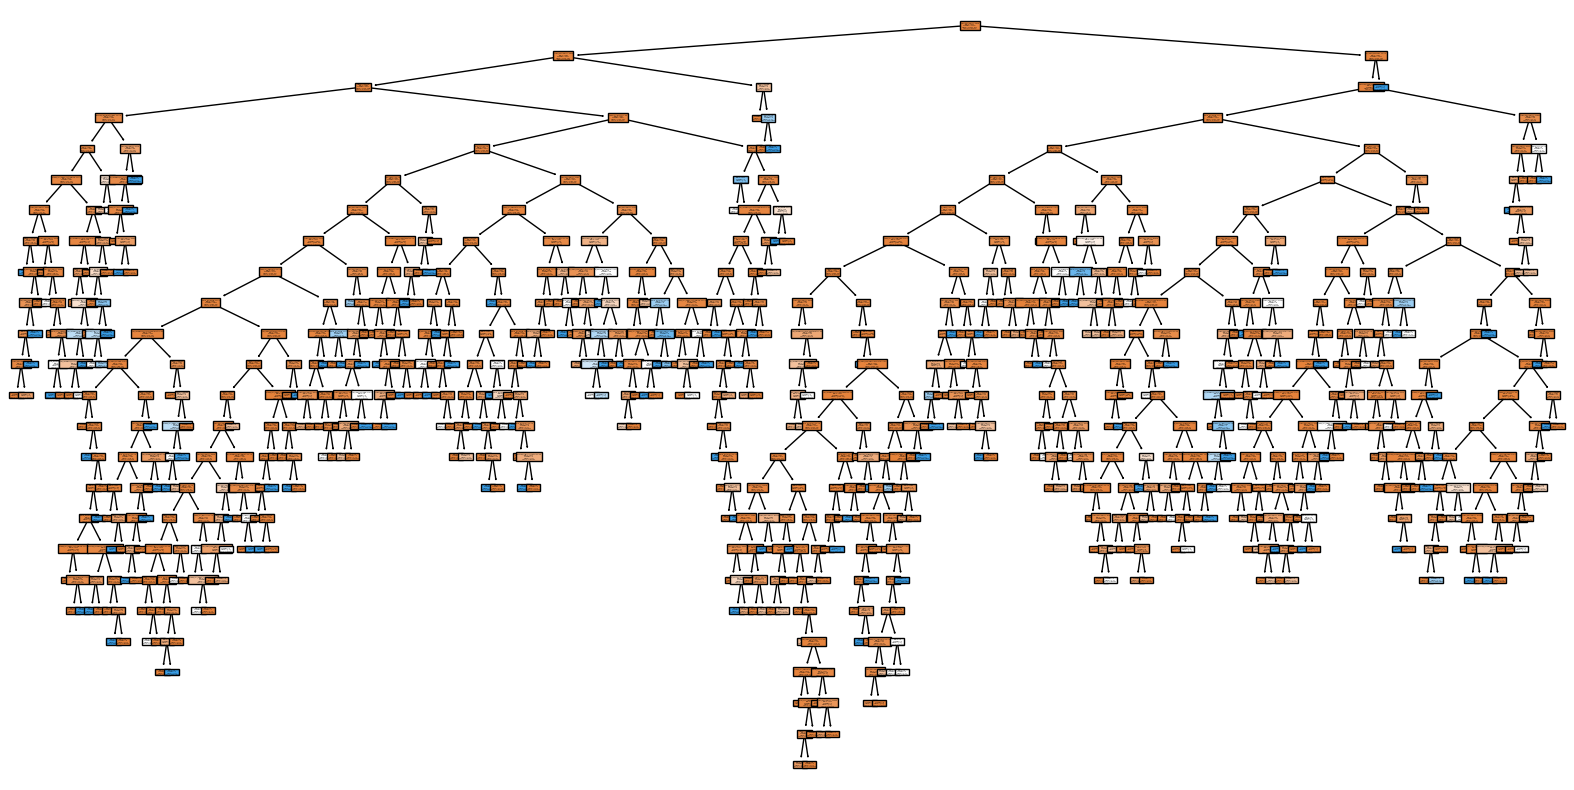

In [53]:
#plotando a árvore

plt.figure(figsize=(20, 10))
plot_tree(clf,
          filled=True,
          class_names=["aprovados", "reprovados"],
          feature_names=X_train.columns);

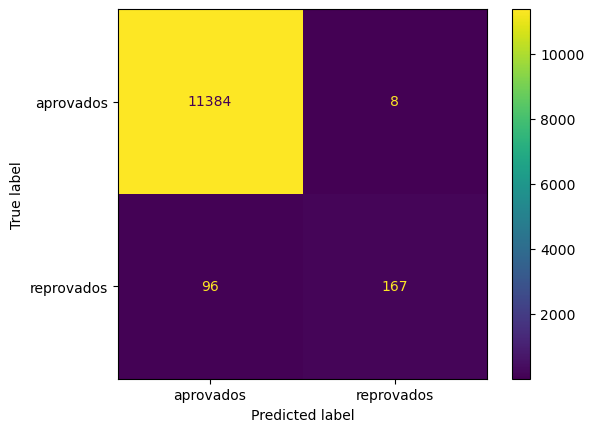

In [70]:
predictions = clf.predict(X_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["aprovados", "reprovados"])
disp.plot()

In [71]:
accuracy_score(y_train, predictions) # acurácia altíssima = 0.99

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [64]:
clf_test = DecisionTreeClassifier(random_state=100) # classificando a base de treinos
clf_test = clf_test.fit(X_train,y_train)

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(clf,
          filled=True,
          class_names=["aprovados", "reprovados"],
          feature_names=X_train.columns);

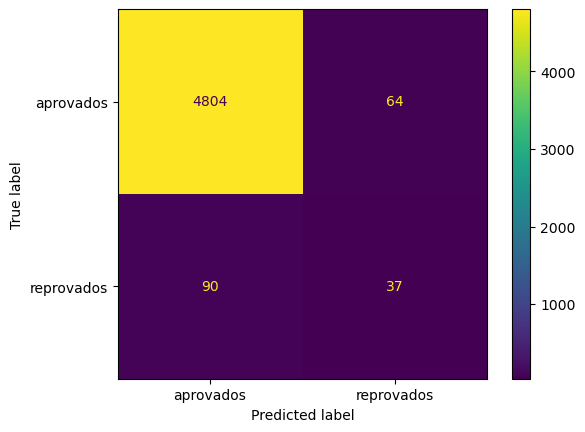

In [65]:
# matriz de confusão
predictions_test = clf_test.predict(X_test)
cm = confusion_matrix(y_test, predictions_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["aprovados", "reprovados"])
disp.plot()

In [68]:
accuracy_score(y_test, predictions_test) #  acurácia de test é menor que de treino = 0.969.

0.9691691691691692

In [72]:
accuracy_score(y_train, predictions) # acurácia altíssima = 0.991

0.991076791076791

In [76]:
# treinando uma nova árvore com poda: número mínimo de observações por folha de 5 e máximo de profundidade de 10

clf_podada = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf_podada.fit(X_train,y_train)
predict_podada = clf.predict(X_test)
accuracy_score(y_test, predict_podada)

0.9727727727727727

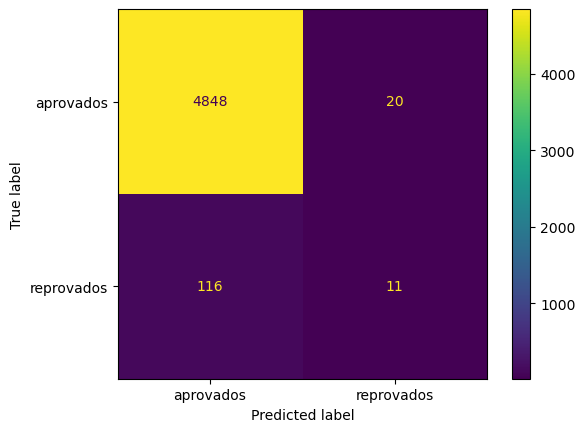

In [77]:
cm = confusion_matrix(y_test, predict_podada, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["aprovados", "reprovados"])
disp.plot()

In [78]:
X_test.shape

(4995, 39)

In [81]:
(11+116)/4995 
# percentual de proponentes classificados como 'maus': 0.025
#somando somente aqueles que foram classificado maus pelo ^y

0.025425425425425426

In [82]:
(4848+116)/4995
# se todos fossem classificados como bons a acurácia subiria para 0.99

0.9937937937937938